<a href="https://colab.research.google.com/github/astrrr/Image-Processing-Lab/blob/main/Activity7_imagprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 7.1 Effects of interpolation techniques in Image Resizing

In [77]:
# Read image file
img = cv2.imread('/content/drive/MyDrive/imageprocessing_activity7/Grid_Image.JPG')
src = cv2.imread('/content/drive/MyDrive/data_fix_angle_no_aug/test/sek_at_jamesRoom_correct_104.png')
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

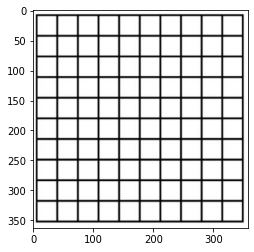

In [6]:
plt.imshow(img)

In [32]:
# Define resize factor
Reduce_factors = [2, 4, 5, 7, 8, 10, 15] # อย่างน้อย 3 ค่า
#Scale_factors = 1/ Reduce_factors
Scale_factors = [1/2, 1/5, 1/10]

# Define interpolation method
inter_methods = [cv2.INTER_NEAREST,cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA]

In [13]:
Scale_factors

[0.5, 0.2, 0.1]

In [33]:
print(img.shape[0]) #hight
print(img.shape[1]) #widht

363
358


In [79]:
dim = []
dim2 = []
for i in range(len(Scale_factors)):
  temp = (int(img.shape[1]*Scale_factors[i]), int(img.shape[0]*Scale_factors[i]))
  temp2 = (int(src.shape[1]*Scale_factors[i]), int(src.shape[0]*Scale_factors[i]))
  dim.append(temp)
  dim2.append(temp2)

In [80]:
dim

[(179, 181), (71, 72), (35, 36)]

In [81]:
# new_img = cv2.resize(img, dim, interpolation = cv2.INTER_NEAREST)

In [83]:
# Display results using each scale_factors & interpolation methods
list_img = []
list_img2 = []
for i in range(len(dim)):
    for k in range(len(inter_methods)):
        new_img = cv2.resize(img, dim[i], interpolation = inter_methods[k])
        new_img2 = cv2.resize(src, dim2[i], interpolation = inter_methods[k])
        list_img.append(new_img)
        list_img2.append(new_img2)

In [38]:
len(list_img)

12

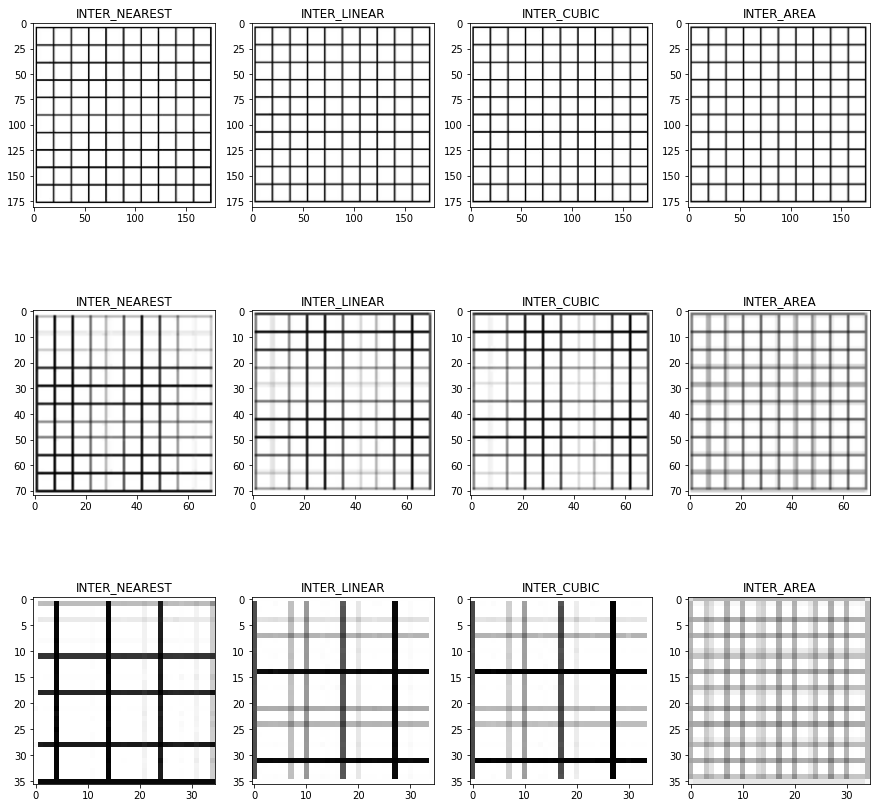

In [41]:
rows = 3
columns = 4
fig = plt.figure(figsize=(15, 15))

fig.add_subplot(rows,columns,1)
plt.title('INTER_NEAREST')
plt.imshow(list_img[0])

fig.add_subplot(rows,columns,2)
plt.title('INTER_LINEAR')
plt.imshow(list_img[1])

fig.add_subplot(rows,columns,3)
plt.title('INTER_CUBIC')
plt.imshow(list_img[2])

fig.add_subplot(rows,columns,4)
plt.title('INTER_AREA')
plt.imshow(list_img[3])


fig.add_subplot(rows,columns,5)
plt.title('INTER_NEAREST')
plt.imshow(list_img[4])

fig.add_subplot(rows,columns,6)
plt.title('INTER_LINEAR')
plt.imshow(list_img[5])

fig.add_subplot(rows,columns,7)
plt.title('INTER_CUBIC')
plt.imshow(list_img[6])

fig.add_subplot(rows,columns,8)
plt.title('INTER_AREA')
plt.imshow(list_img[7])


fig.add_subplot(rows,columns,9)
plt.title('INTER_NEAREST')
plt.imshow(list_img[8])

fig.add_subplot(rows,columns,10)
plt.title('INTER_LINEAR')
plt.imshow(list_img[9])

fig.add_subplot(rows,columns,11)
plt.title('INTER_CUBIC')
plt.imshow(list_img[10])

fig.add_subplot(rows,columns,12)
plt.title('INTER_AREA')
plt.imshow(list_img[11])

plt.show()

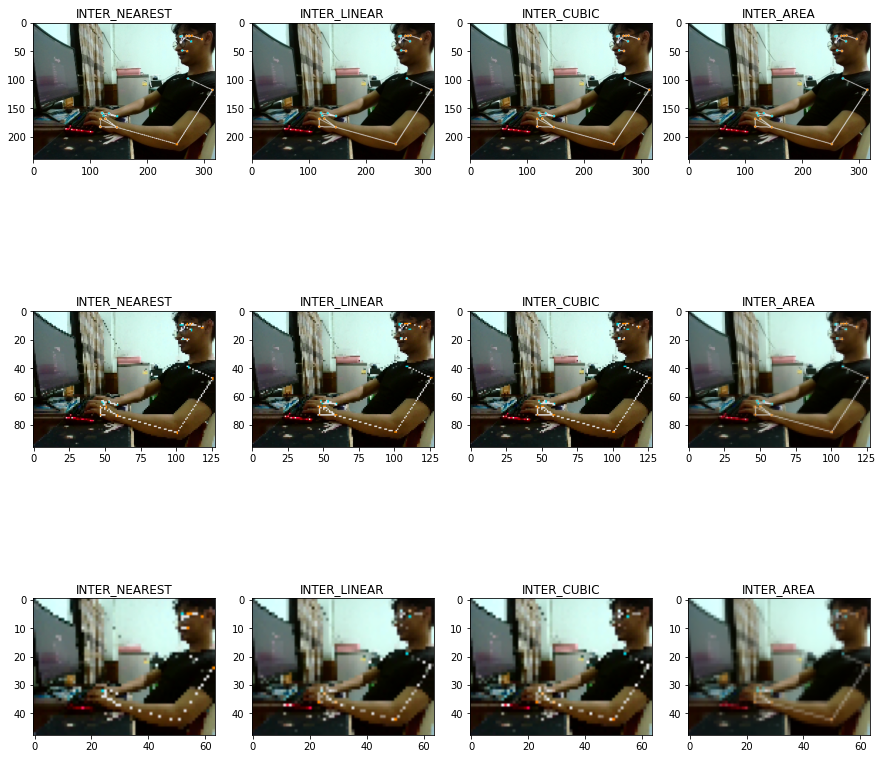

In [84]:
rows = 3
columns = 4
fig = plt.figure(figsize=(15, 15))

fig.add_subplot(rows,columns,1)
plt.title('INTER_NEAREST')
plt.imshow(list_img2[0])

fig.add_subplot(rows,columns,2)
plt.title('INTER_LINEAR')
plt.imshow(list_img2[1])

fig.add_subplot(rows,columns,3)
plt.title('INTER_CUBIC')
plt.imshow(list_img2[2])

fig.add_subplot(rows,columns,4)
plt.title('INTER_AREA')
plt.imshow(list_img2[3])


fig.add_subplot(rows,columns,5)
plt.title('INTER_NEAREST')
plt.imshow(list_img2[4])

fig.add_subplot(rows,columns,6)
plt.title('INTER_LINEAR')
plt.imshow(list_img2[5])

fig.add_subplot(rows,columns,7)
plt.title('INTER_CUBIC')
plt.imshow(list_img2[6])

fig.add_subplot(rows,columns,8)
plt.title('INTER_AREA')
plt.imshow(list_img2[7])


fig.add_subplot(rows,columns,9)
plt.title('INTER_NEAREST')
plt.imshow(list_img2[8])

fig.add_subplot(rows,columns,10)
plt.title('INTER_LINEAR')
plt.imshow(list_img2[9])

fig.add_subplot(rows,columns,11)
plt.title('INTER_CUBIC')
plt.imshow(list_img2[10])

fig.add_subplot(rows,columns,12)
plt.title('INTER_AREA')
plt.imshow(list_img2[11])

plt.show()

# 7.2 IMAGE AUGMENTATION USING KERAS IMAGEDATAGENERATOR

In [72]:
src = cv2.imread('/content/drive/MyDrive/data_fix_angle_no_aug/test/sek_at_jamesRoom_correct_104.png')
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

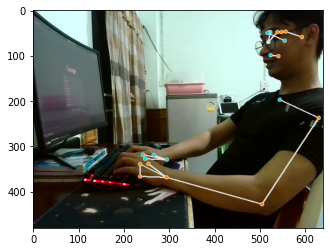

In [73]:
plt.imshow(src)

In [74]:
src = cv2.cvtColor(src, cv2.COLOR_RGB2BGR)
# Define fill method
fill_method = ['constant', 'nearest', 'reflect', 'wrap']

In [75]:
# Define parameters
Npic= 20
rotation_range=45
width_shift_range=0.1
height_shift_range=0.1
shear_range=0.1
zoom_range = 0.1
horizontal_flip=True

In [76]:
fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
writer = cv2.VideoWriter('out.mp4', fourcc, 2, (src.shape[1], src.shape[0]))

x = np.expand_dims(src, axis=0)

for m in fill_method:
    datagen = ImageDataGenerator( rotation_range = rotation_range,
                                    width_shift_range = width_shift_range,
                                    height_shift_range = height_shift_range,
                                    shear_range = shear_range,
                                    zoom_range = zoom_range,
                                    horizontal_flip = horizontal_flip,
                                    fill_mode = m)

    # Creates our batch of one image
    pic = datagen.flow(x, batch_size =1)

    # Random generate transformed images and write to a video file
    for i in range(1, Npic):
      batch = pic.next()
      im_result = batch[0].astype('uint8')
      writer.write(im_result)
writer.release() 